In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)

In [4]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score 
import statsmodels.api as sm 

In [35]:
data = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/MBASalary.csv')

In [36]:
data.head()

,Percentage Marks,Salary
0,62.00,270000
1,76.33,200000
2,72.00,240000
3,60.00,250000
4,61.00,180000


In [37]:
data.shape

(50, 2)

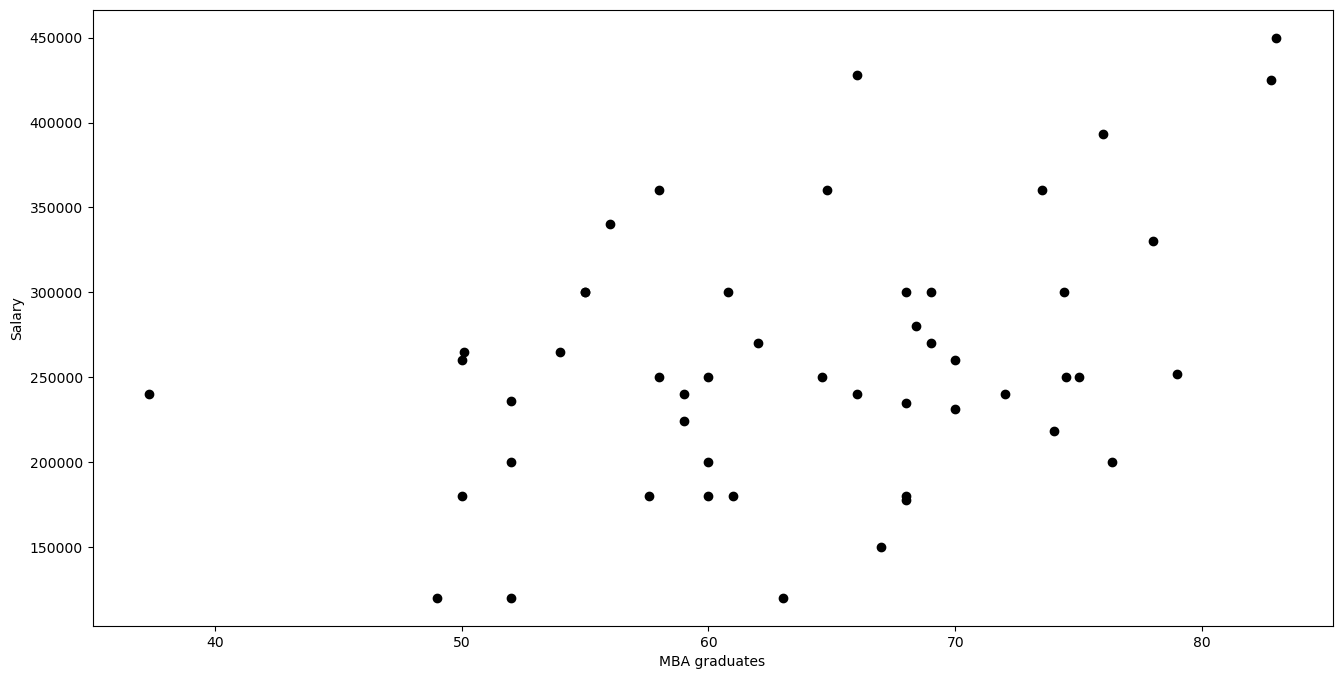

In [38]:
plt.figure(figsize=(16, 8))
plt.scatter(
data['Percentage Marks'],
data['Salary'],
c='black'
)
plt.xlabel("MBA graduates")
plt.ylabel("Salary")
plt.show()

In [39]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
training, testing =train_test_split(data, test_size= 0.30, random_state=24)

In [40]:
training

,Percentage Marks,Salary
49,60.80,300000
42,74.40,300000
21,50.00,260000
14,68.00,300000
22,69.00,300000
44,73.50,360000
24,49.00,120000
6,70.00,260000
46,68.00,180000
31,60.00,200000


# Implementing Simple linear regression using Gradient Descent


In [50]:
#Building the model
m = 0
c = 0
L = 0.01
epochs = 5

In [51]:
n = float(len(data['Percentage Marks'])) 

In [52]:
# Performing Gradient Descent
for i in range(epochs):
    Y_pred = m*(data['Percentage Marks']) + c 
    D_m = (-2/n) * sum(data['Percentage Marks'] * (data['Salary'] - Y_pred)) 
    D_c = (-2/n) * sum(data['Salary'] - Y_pred) 
    m = m - L * D_m 
    c = c - L * D_c 
print (m, c)

15486211068930.066 236746943499.1038


# prediction

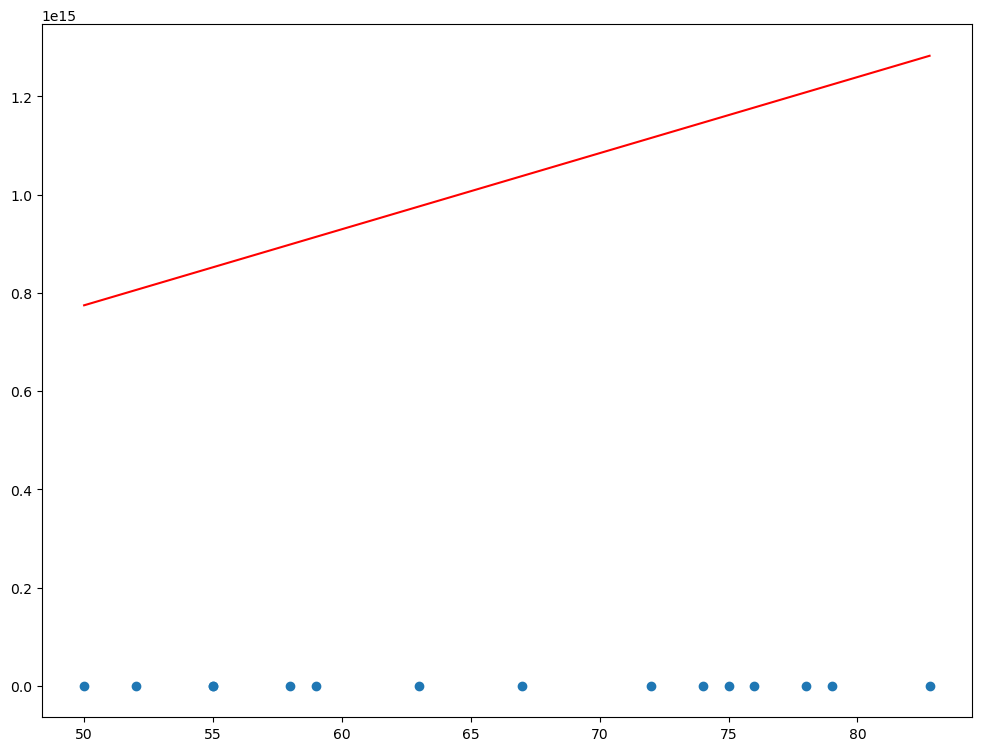

In [55]:
Y_pred = m*(testing['Percentage Marks']) + c

plt.scatter(testing['Percentage Marks'],testing['Salary'])
plt.plot([min(testing['Percentage Marks']), max(testing['Percentage Marks'])], [min(Y_pred), max(Y_pred)], 
color='red') 
plt.show()

# Assessing the efficiency and Performance of the model

In [56]:
X = testing['Percentage Marks'] 
y = testing['Salary'] 
X2 = sm.add_constant(X)
est = sm.OLS(y, X2) 
est2 = est.fit() 
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     3.255
Date:                Tue, 17 Oct 2023   Prob (F-statistic):             0.0944
Time:                        10:18:17   Log-Likelihood:                -188.90
No. Observations:                  15   AIC:                             381.8
Df Residuals:                      13   BIC:                             383.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3.478e+04   1.25e+05  

C:\Users\hp\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
